# BIKE SHARING ASSIGNMENT

## 1. Importing All Libraries

In [1]:
# Importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## 2. Reading The Data Set

In [2]:
# Importing the data(Bike data)
Bike = pd.read_csv("day.csv")
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the tail of the data
Bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
# Checking the info of the dataset
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# so there are no null values in the data set

In [6]:
# Checking the shape 
Bike.shape

(730, 16)

In [7]:
# So there are 730 rows and 16 Columns

In [8]:
# Checking the describe
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking with the help of unique values 
Bike.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# 3. Data Quality Check 

In [10]:
# Checking the missing values in Bike Sharing Data
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# So we can directly see that there is no null values in the whole data

In [12]:
# We have noticed the column names are not in the correct format.So we will correct them

In [13]:
Bike = Bike.rename(columns={'yr':'year',
                           'weathersit':'weather',
                           'mnth':'month',
                           'hum':'humidity',
                           'cnt':'count',
                           'dteday':'day'})
Bike.head()

,instant,day,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 ### Categorical variables and Numeric Variables 
  ### -  Categorical Variables: 
          - season 
          - month 
          - weather 
          - weekday
  ### -  Numeric Variables: 
          - windspeed
          - hum 
          - temp 
          - atemp 
          - count

In [14]:
# Dropping some unwanted columns in Data
Bike = Bike.drop(columns=['instant', 'day', 'casual', 'registered'])
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


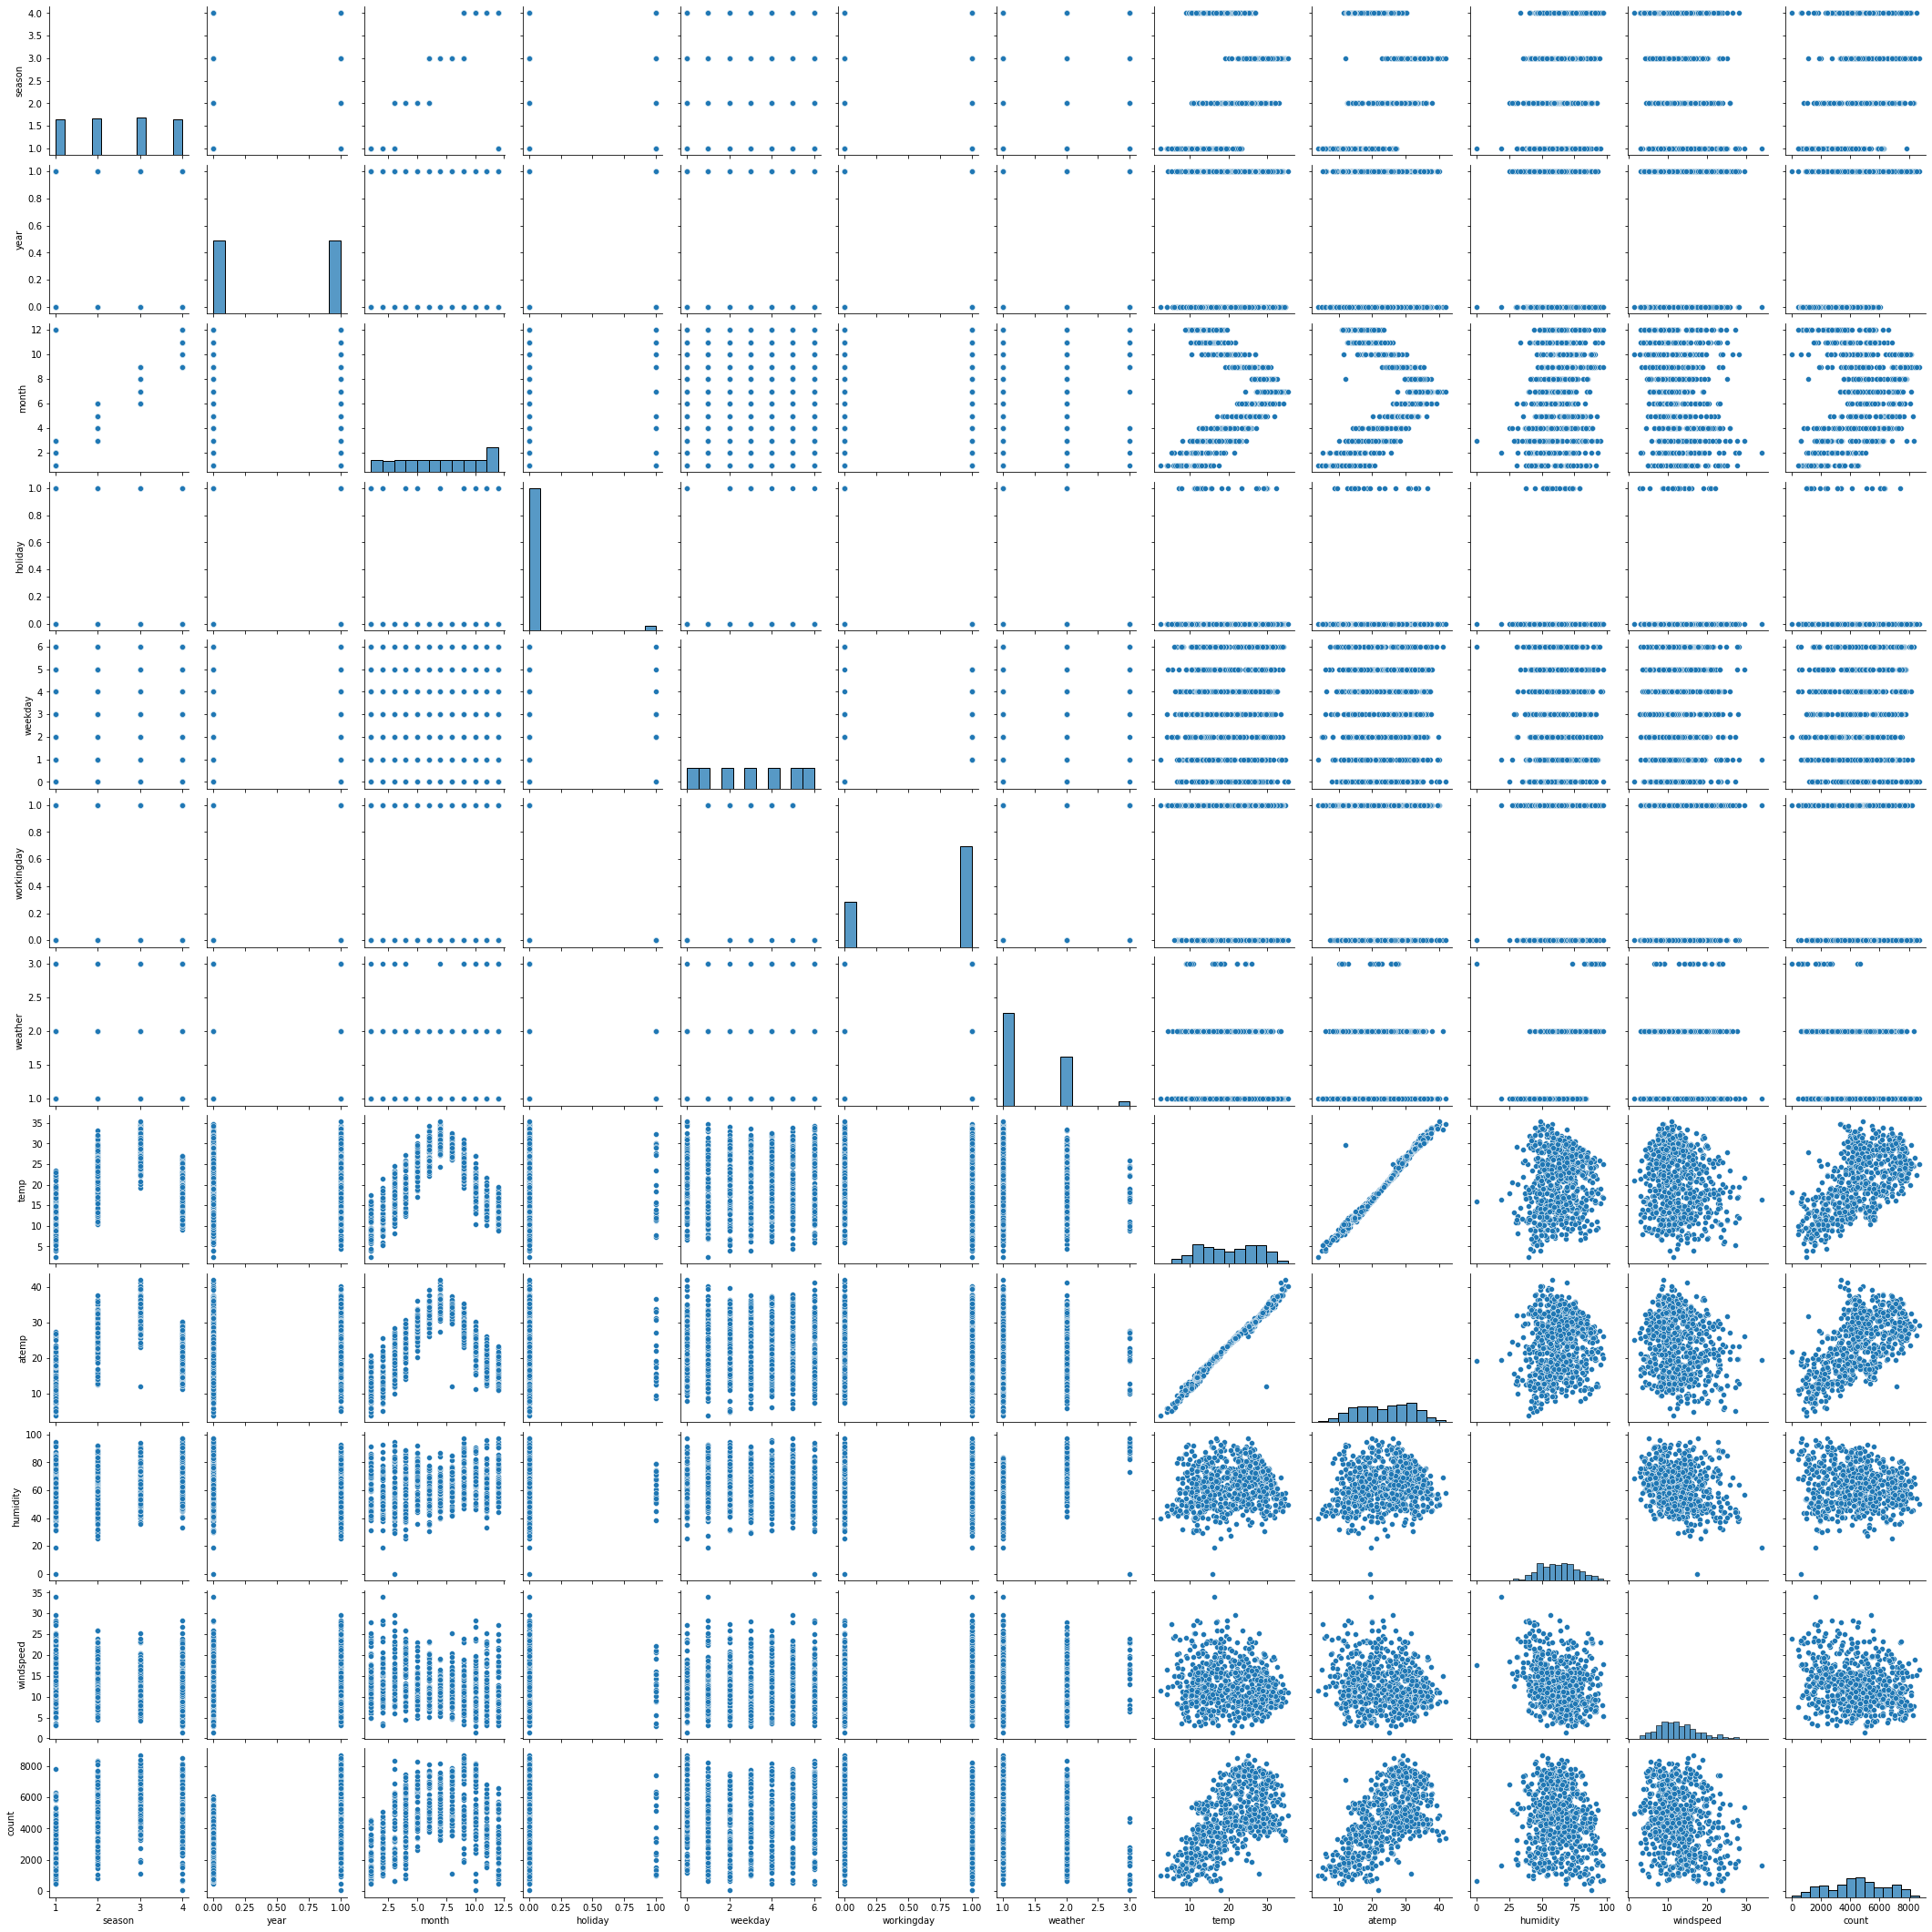

In [15]:
# Plotting pair plot for clear understanding of the data
sns.pairplot(Bike)
plt.show()

In [16]:
# Checking the dtypes 
Bike.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [17]:
# So we will Map the categorical columns to their actual Category Names
# season
# weather
# month
# Weekday
# Year

In [18]:
# Mapping the season in categorical column as Spring, summer, fall, winter
season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
Bike.season=[season[item] for item in Bike.season]

In [19]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# Mapping weather in categorical column as clear, mist & coludy, light rain & snow and heavy rain & snow.
weather = {1:'clear', 2:'mist & cloudy', 3:'light rain & snow', 4:'heavy rain & fog'}
Bike.weather=[weather[item] for item in Bike.weather]

In [21]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,1,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Mapping month in categorical column as Jan to Dec.
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
Bike.month = [month[item] for item in Bike.month]

In [23]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,1,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Mapping weekday in categorical column as Sunday to Saturday.
weekday = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
Bike.weekday = [weekday[item] for item in Bike.weekday]

In [25]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Monday,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Mapping Year in categorical column as 2018 and 2019.
year = {0:2018, 1:2019}
Bike.year = [year[item] for item in Bike.year]

In [27]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Monday,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# 4. Exploratory Data Analysis

### Count is the Target Variable

In [28]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Monday,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
Bike[['season', 'month', 'weather', 'weekday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   730 non-null    object
 1   month    730 non-null    object
 2   weather  730 non-null    object
 3   weekday  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


In [30]:
Bike[['temp', 'atemp', 'humidity', 'windspeed','holiday', 'year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       730 non-null    float64
 1   atemp      730 non-null    float64
 2   humidity   730 non-null    float64
 3   windspeed  730 non-null    float64
 4   holiday    730 non-null    int64  
 5   year       730 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 34.3 KB


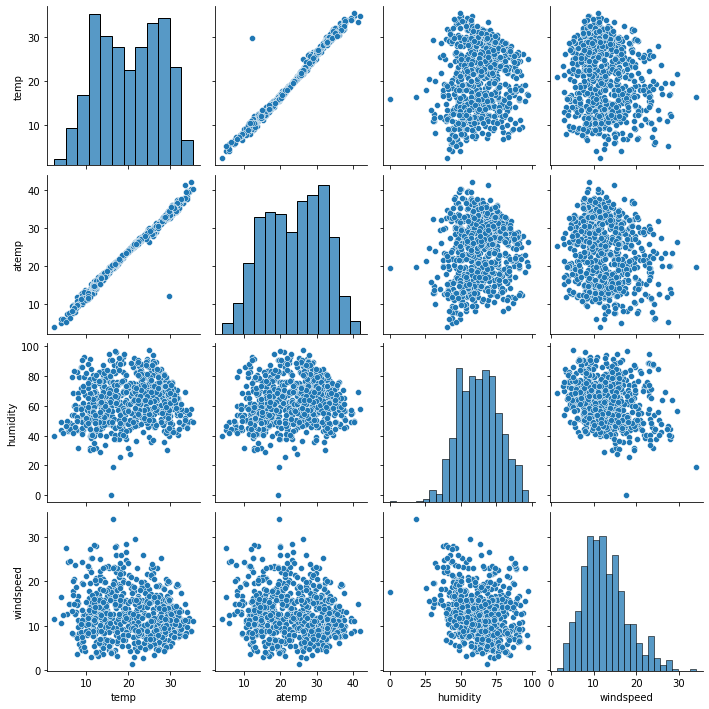

In [31]:
# Plotting pair plot for Numeric Variables
sns.pairplot(data = Bike, vars=['temp', 'atemp', 'humidity', 'windspeed'])
plt.show()

###  Observation:

* while looking a the above graph we can easily notice that
  - Bike rental show some positive correlation with temp and atemp
  - Bike rental show some negative correlation with humidity  

In [32]:
# Plotting Graph for Various Variable and here our target is 'Count'.

Text(0, 0.5, 'count')

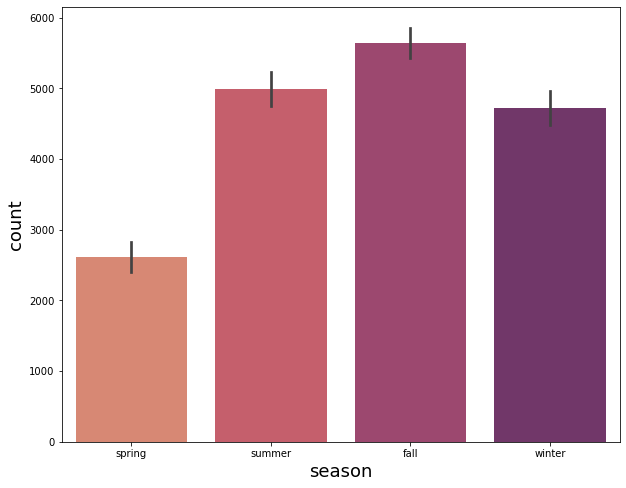

In [33]:
# Checking the demand in variuos seasons
plt.figure(figsize = [10,8])
sns.barplot(data = Bike, x ='season', y ='count', palette = 'flare')
plt.xlabel('season', fontsize=18)
plt.ylabel('count', fontsize=18)

Text(0, 0.5, 'count')

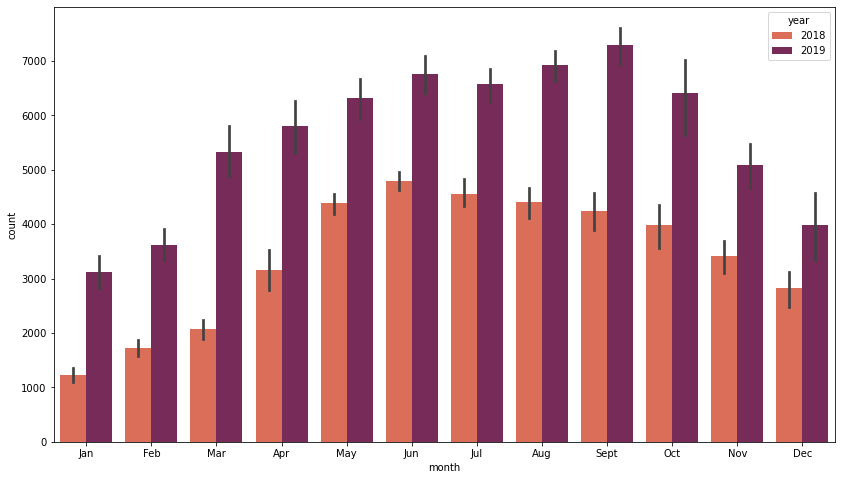

In [34]:
# Checking the various demand in Month
plt.figure(figsize = [14,8])
sns.barplot(data = Bike, x='month', y='count', hue='year', palette='rocket_r' )
plt.xlabel('month', fontsize=10)
plt.ylabel('count', fontsize=10)

In [35]:
# Now we will plot deman using year variable.So year variable has 2018 and 2019
# 0:2018
# 1:2019
# we have taken 0 as 2018 and 1 as 2019

Text(0, 0.5, 'count')

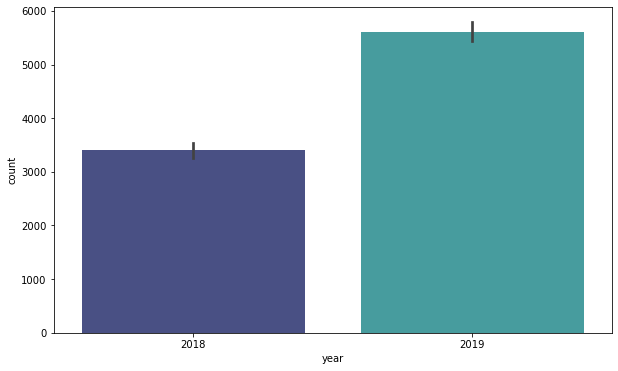

In [36]:
plt.figure(figsize=[10,6])
sns.barplot(data=Bike, x='year', y='count', palette='mako')
plt.xlabel('year', fontsize=10)
plt.ylabel('count', fontsize=10)

Text(0, 0.5, 'count')

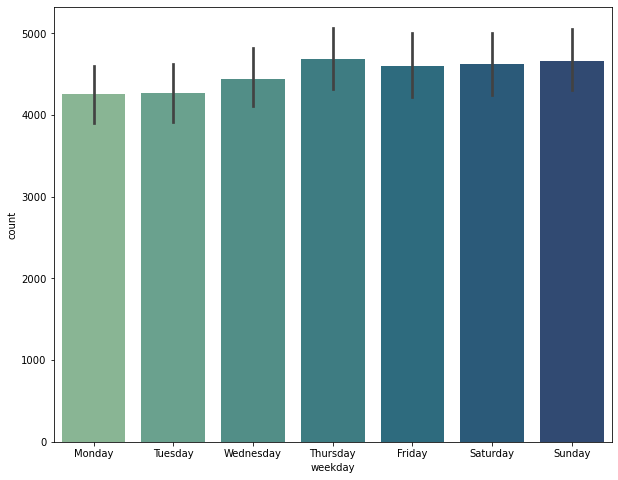

In [37]:
# checking weekday variable for Bike demand.
plt.figure(figsize = [10,8])
sns.barplot(data=Bike, x='weekday', y='count', palette='crest')
plt.xlabel('weekday', fontsize=10)
plt.ylabel('count', fontsize=10)


<AxesSubplot:>

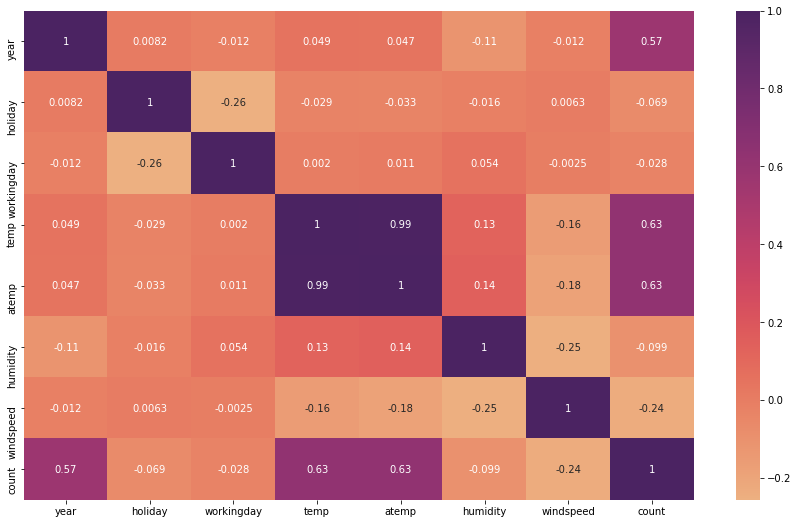

In [38]:
# Checking Correlation of all varibales through heatmap.
plt.figure(figsize = [15, 9])
sns.heatmap(Bike.corr(), annot=True, cmap = 'flare')

In [39]:
# Dropping atemp has it is very highly correlated with temp
Bike.drop(['atemp'], axis = 1, inplace=True)

In [40]:
Bike.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Monday,1,mist & cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,mist & cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


In [41]:
# So now we can see that atemp has been dropped.

<AxesSubplot:>

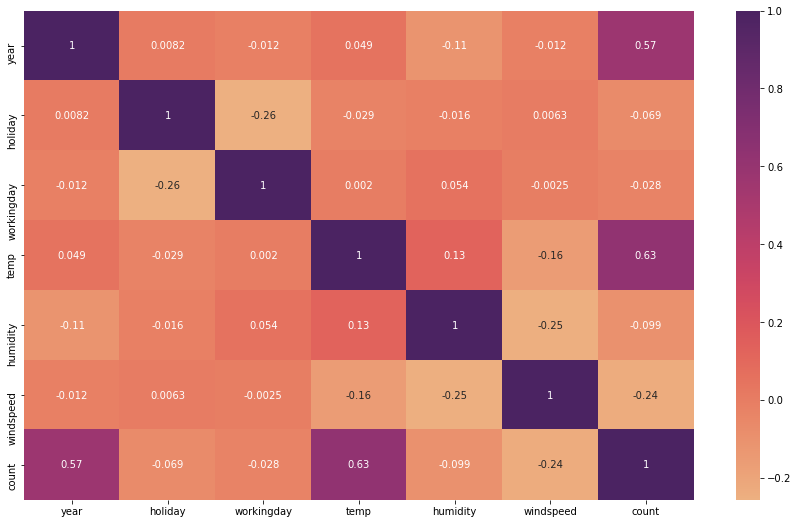

In [42]:
# Plotting heatmap again to check correlation matrix after dropping atemp
plt.figure(figsize=[15, 9])
sns.heatmap(Bike.corr(), annot=True, cmap = 'flare')

# 5. Data Preparation

### Dummy Variables

In [43]:
# Now we will create dummy variables for Categorical Variables

In [44]:
# Categorical Variables
# season
# month
# weekday
# weather

In [45]:
# So all the above varibales has dummy variables in it.
# Now we will get all those dummies using pd.get and we will store it in new variable.

In [46]:
# Dropping the first column from status Bike using 'drop_first = True'
Season = pd.get_dummies(Bike['season'], drop_first=True)
Season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [47]:
# Dropping the first column from status1 Bike using 'drop_first = True'
Month = pd.get_dummies(Bike['month'], drop_first=True)
Month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [48]:
# Dropping the first column from status2 Bike using 'drop_first = True'
Weekdays = pd.get_dummies(Bike['weekday'], drop_first=True)
Weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [49]:
# dropping the first column from status3 Bike using 'drop_first = True'
Weather = pd.get_dummies(Bike['weather'], drop_first=True)
Weather.head()

,light rain & snow,mist & cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [50]:
Years = pd.get_dummies(Bike['year'], drop_first=True)
Years.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [51]:
# Now we will concat all status to data
Bike = pd.concat([Bike, Season, Month, Weekdays, Weather,Years], axis=1)
Bike

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy,2019
0,spring,2018,Jan,0,Monday,1,mist & cloudy,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,1,0
1,spring,2018,Jan,0,Tuesday,1,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,1,0
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,0,0,0
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,mist & cloudy,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,0,0,1,1
726,spring,2019,Dec,0,Saturday,0,mist & cloudy,10.386653,59.0000,10.416557,...,0,0,1,0,0,0,0,0,1,1
727,spring,2019,Dec,0,Sunday,0,mist & cloudy,10.386653,75.2917,8.333661,...,0,0,0,1,0,0,0,0,1,1
728,spring,2019,Dec,0,Monday,1,clear,10.489153,48.3333,23.500518,...,0,1,0,0,0,0,0,0,0,1


In [52]:
#  So now we got 730 rows and 33 columns after concating new dummy variables.

In [53]:
# Dropping columns of categorical variables
Bike.drop(['season', 'month', 'weekday', 'weather', 'year'], axis=1, inplace=True)

In [54]:
# Verifying again 
Bike.shape

(730, 29)

###  Splitting the Data into Training and Testing Set

In [55]:
# So our first basic step for regression is performing train-test split
Bike_train, Bike_test = train_test_split(Bike, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [56]:
# Now we have trained dataset and we will check their shape
Bike_train.shape

(510, 29)

In [57]:
# Checking the shape of data_test
Bike_test.shape

(219, 29)

### Scaling The Features

In [58]:
scaler = MinMaxScaler()

In [59]:
# Now we will do scaler() on Numeric columns 'winsdpeed', 'temp', 'humidity', 'count'
numeric_var = ['windspeed', 'temp', 'humidity', 'count']
Bike_train[numeric_var] = scaler.fit_transform(Bike_train[numeric_var])
Bike_train.head()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy,2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


In [60]:
Bike.describe()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy,2019
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,...,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.500000
std,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,...,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.500343
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


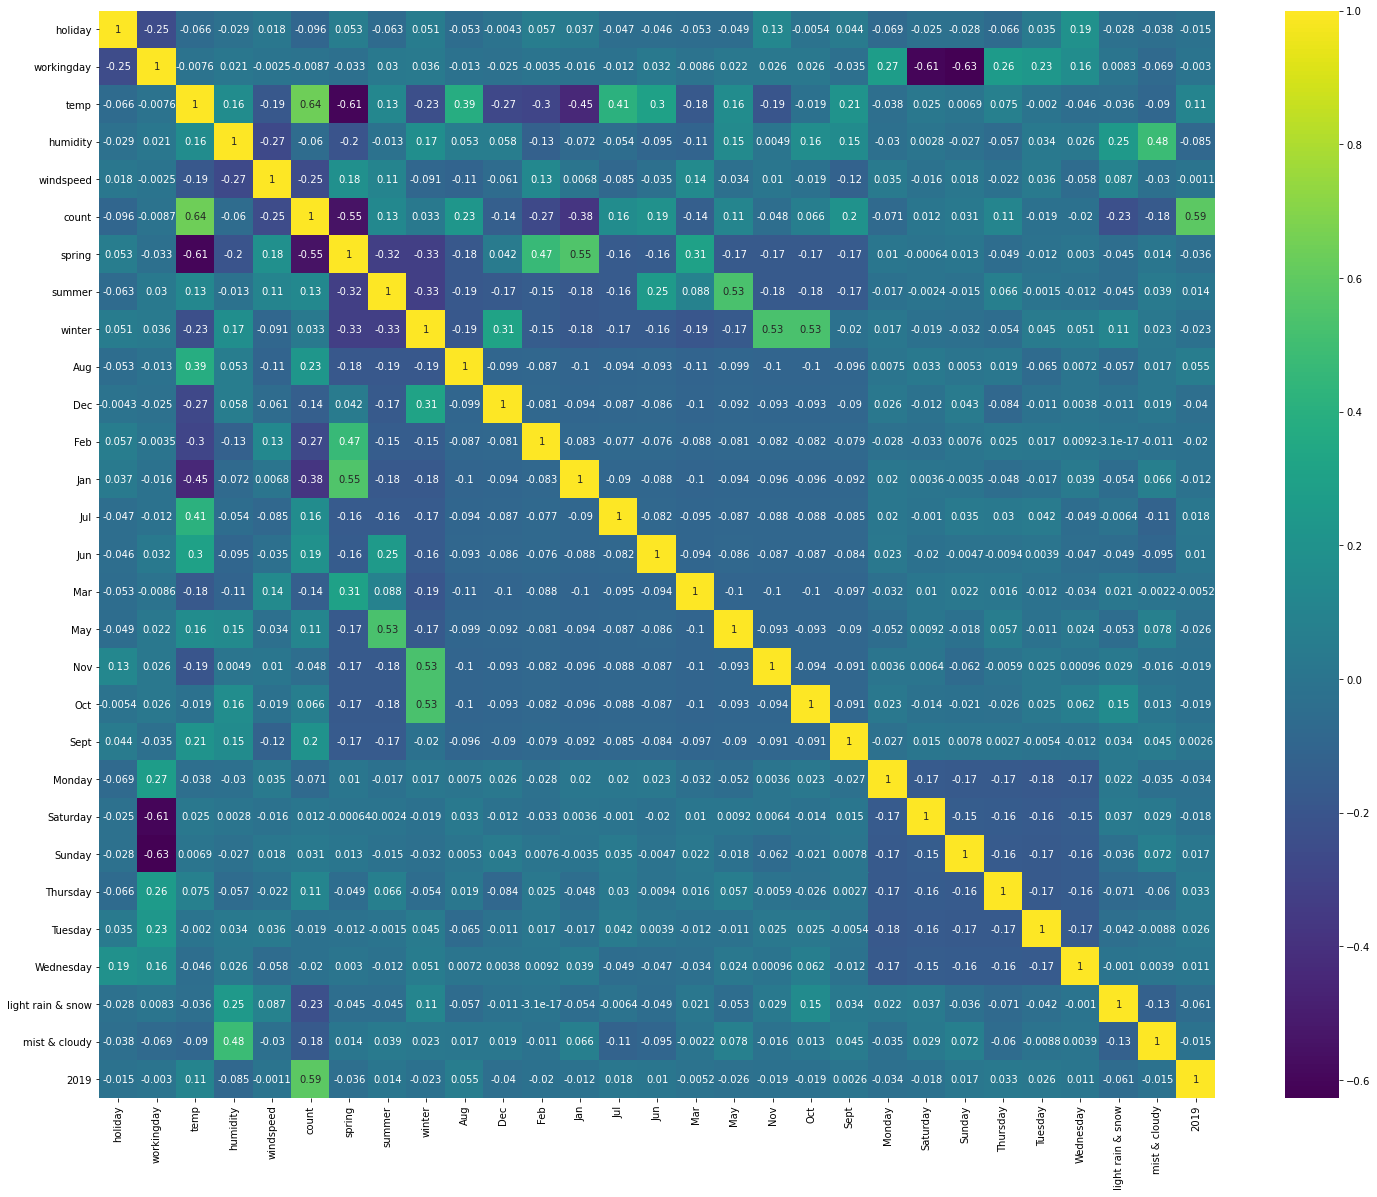

In [61]:
# Now we will plot heatmap to check correlation coefficient to see which variables are highly correlated

plt.figure(figsize=[25,20])
sns.heatmap(Bike_train.corr(), annot=True, cmap='viridis')
plt.show()

In [62]:
# Now we can observe here that 'year' is highly correlated with count

### Dividing into X and Y sets for the Model Building

In [63]:
y_train = Bike_train.pop('count')
X_train = Bike_train

# 6. Building Linear Model

## RFE

### Recursive Feature Elimination

In [64]:
# We will run RFE with the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # Running RFE on 15 variables
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('light rain & snow', True, 1),
 ('mist & cloudy', True, 1),
 (2019, True, 1)]

In [66]:
col = X_train.columns[rfe.support_]
col

Index([          'holiday',              'temp',          'humidity',
               'windspeed',            'spring',            'summer',
                  'winter',               'Dec',               'Jan',
                     'Jul',               'Nov',              'Sept',
       'light rain & snow',     'mist & cloudy',                2019],
      dtype='object')

### Building Model using StatsModel, for the detailed Statistics

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

### Model 1

In [67]:
# Creating X_train_rfe with selected 10 variables
X_train_rfe = X_train[col]

In [68]:
# Adding constant Variable for clear Unnderstanding
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          3.34e-189
Time:                        22:55:35   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.03

In [70]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,82.48
5,spring,5.27
2,temp,4.42
7,winter,3.83
6,summer,2.76
3,humidity,1.93
11,Nov,1.76
9,Jan,1.68
14,mist & cloudy,1.57
8,Dec,1.49


In [71]:
# We can clearly notice here that const VIF is very high, hence we will drop them

In [72]:
# Now dropping the const variable 
X_train_n = X_train_rfe.drop(['const'], axis=1)

### Model 2

In [73]:
# We will add another constant variable
X_train_lm = sm.add_constant(X_train_n)

# Running the linear Model
lm = sm.OLS(y_train, X_train_lm).fit()
# checking the summary using lm.summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          3.34e-189
Time:                        22:55:36   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.03

In [74]:
# Our method is to calculate VIF for new model
vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,humidity,30.94
1,temp,17.80
3,windspeed,4.72
4,spring,4.37
6,winter,4.06
5,summer,2.81
13,mist & cloudy,2.32
14,2019,2.09
10,Nov,1.83
8,Jan,1.75


In [75]:
# So we can notice that 'humidity' has very high  VIF
X_train_n = X_train_n.drop(['humidity'], axis=1)

### Model 3

In [76]:
# We will add a constant variable
X_train_lm = sm.add_constant(X_train_n)

# Running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()
# Checking the summary  using lm.summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.57e-186
Time:                        22:55:37   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2466      0.03

In [77]:
# Our next step is to calculate VIF for the model 3
vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
5,winter,2.94
3,spring,2.89
4,summer,2.23
13,2019,2.07
9,Nov,1.80
7,Jan,1.66
8,Jul,1.59
12,mist & cloudy,1.56


### Model 4

In [78]:
# We wil add a constant variable
X_train_lm = sm.add_constant(X_train_n)

# Running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()
# checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.57e-186
Time:                        22:55:37   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2466      0.03

In [79]:
# We will drop 2019 here
X_train_n = X_train_n.drop(['Dec'], axis = 1)

### Model 5

In [80]:
# Now will continue with constant Varaible
X_train_lm = sm.add_constant(X_train_n)

# We will run the linear model
lm = sm.OLS(y_train, X_train_lm).fit()
# Checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.54e-186
Time:                        22:55:37   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2214      0.03

In [81]:
# Calculating VIFs for the above model
vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,temp,5.15
2,windspeed,4.67
3,spring,2.76
5,winter,2.29
4,summer,2.23
12,2019,2.07
6,Jan,1.61
7,Jul,1.59
8,Nov,1.59
11,mist & cloudy,1.56


In [82]:
# Now we will drop 'Jan'
X_train_n = X_train_n.drop(['Jan'], axis = 1)

###  Model 6

In [83]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_n)

# We will run a linear model
lm = sm.OLS(y_train, X_train_lm).fit()
# checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.76e-186
Time:                        22:55:38   Log-Likelihood:                 499.95
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     497   BIC:                            -918.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2049      0.03

In [84]:
# Calculating VIFs for the above Model
vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,temp,5.11
2,windspeed,4.65
5,winter,2.28
4,summer,2.22
3,spring,2.09
11,2019,2.07
7,Nov,1.59
6,Jul,1.58
10,mist & cloudy,1.55
8,Sept,1.35


In [85]:
# Now we will drop 'Sept' variable
X_train_n = X_train_n.drop(['Sept'], axis = 1)

### Model 7

In [86]:
# Again we will add constant variable
X_train_lm = sm.add_constant(X_train_n)

# We will run linear regression model
lm = sm.OLS(y_train, X_train_lm).fit()
# Checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.19e-183
Time:                        22:55:38   Log-Likelihood:                 490.43
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     498   BIC:                            -906.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2340      0.03

In [87]:
# Now we will calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,4.65
1,temp,4.45
5,winter,2.25
10,2019,2.07
3,spring,2.01
4,summer,1.99
7,Nov,1.58
9,mist & cloudy,1.53
6,Jul,1.46
8,light rain & snow,1.08


In [88]:
# Now we will drop 'summer' variable
X_train_n = X_train_n.drop(['summer'], axis = 1)

### Model 8

In [89]:
# Now we will add constant variable for our model 8
X_train_lm = sm.add_constant(X_train_n)

# Running linear regression on variable
lm = sm.OLS(y_train, X_train_lm).fit()
# Checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.56e-184
Time:                        22:55:39   Log-Likelihood:                 489.67
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2548      0.02

In [90]:
# Now we will calculate VIFs for the above model

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,temp,4.24
2,windspeed,4.00
9,2019,2.06
4,winter,1.92
3,spring,1.65
6,Nov,1.58
8,mist & cloudy,1.51
5,Jul,1.31
7,light rain & snow,1.08
0,holiday,1.05


##### From the above model we can notice that Pvalues of all the 15 variables are very low and VIF values are also less than 5

#### So we made model 8 and we can notice here that:
 ###### * R- adjusted for training set : 0.830 (83%)
 ###### * Adj- R squared for traning set : 0.826 (82.6%)

## 7. Residual Analysis of the Training set


##### Residual Analysis plays an important role in Validating the regression model

In [91]:
# Now we check the error terms are also normally distributed, we will plot the histogram of the error terms

In [92]:
y_train_count = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

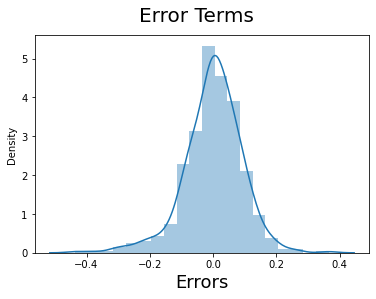

In [93]:
# We will plot histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [94]:
# So while observing from the above model we can clearly state that error terms are noramlly distributed with mean = 0.
# Our assumption is right with the help of model

# 8. Making Prediction Using Final Model

In [95]:
# Applying the scaling on test set 

In [96]:
# we will apply scaling on test set
numeric_var = ['windspeed', 'temp', 'humidity', 'count']
Bike_test[numeric_var] = scaler.transform(Bike_test[numeric_var])

In [97]:
# Now well describe bike_test
Bike_test.describe()

,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy,2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.479452
std,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.500722
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test


In [98]:
# Now we will divide this test into X and y
y_test = Bike_test.pop('count')
X_test = Bike_test

In [99]:
# Creating X_test_n by dropping variables from X_test
X_test_n = X_test[X_train_n.columns]

# Now we will add constant variable
X_test_n = sm.add_constant(X_test_n)

In [100]:
# Making predictions
y_pred = lm.predict(X_test_n)

# 9. Model Evaluation

Text(0, 0.5, 'y_pred')

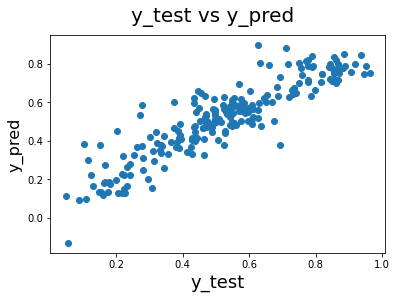

In [101]:
# We will plot y_test and y_pred for clear understanding
plt.figure()
plt.scatter(y_test, y_pred)
plt.suptitle('y_test vs y_pred', fontsize = 20)       # Plot heading
plt.xlabel('y_test' ,fontsize=18)                     # X - label
plt.ylabel('y_pred', fontsize=16)                     # y - label

- It is showing that predicted values have a linear relationship with actual values.

In [102]:
# Calculating R-squared for Test set
# y_test = target variable,
# y_pred = variable containing the predicted values of the target variable on the test set.
r2 = r2_score(y_test,  y_pred)             
r2

0.8103321586720328

####  The most variable which are affecting the demand for shared bikes are
 * temperature
 * year
 * season